In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [1]:
medical_df = pd.read_csv('./medical-charges.csv')

NameError: name 'pd' is not defined

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Checking the datatypes of the columns in the dataset

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Checking the statistics of the numeric columns

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

## Age

In [7]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The maximum age is 64 and the minimum age is 18. We can use a histogram to check the distribution of this column but we need (64 - 18) + 1 bins. We could also use boxplots.

In [8]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

From the graph above, we can see that most of the ages have 20 to 30 individuals with the exception of ages 18 and 19 which a have a frequency of 69 and 68 respectively. That is, it follows a uniform distribution. This may be due to a number of factors.

## BMI


We now take a look at the bmi column to get a sense of how it is distributed.

In [9]:
fig1 = px.histogram(medical_df, x='bmi', marginal='box', \
    color_discrete_sequence=['red'], title='BMI Distribution')
fig1.update_layout(bargap=0.1)
fig1.show()

The _bmi_ column appears to have a normal distribution. It has a median value of around 30.4. Most of the people seem to have a _bmi_ ranging from 22 to 38. Additionally, the _bmi_ mark of 28-29 seem to have the highest frequency with atotal of 92 counts.

# Charges

Now let's explore the _charges_ column.

Since _charges_ is the value we are interested in, we will now take a look at  how each of the features of the dataset affects the charges.

First off, let's look at _charges_ $Vs$ _age._

In [10]:
fig2 = px.scatter(medical_df, x='age', y='charges', title='Age against charges')
fig2.show()

There seem to be some positive correlation between charges and age. There is also a three clusters of datapoints. Lets's investigate this more more taking a look at the _charges_ and _ages_ and _smokers._

In [11]:
fig3 = px.scatter(medical_df, x='age', y='charges', color='smoker', color_discrete_sequence=['red', 'gray'], \
                   title='Age against charges')
fig3.show()

The datapoints down mostly consists of non-smokers. Smokers seem to have high charges. This can be attributed to a number of factors. It can be that smoking weakens their lungs and make them more susceptible to other diseases, consequently raising their need for medical attention and hence the higher medical expenses. It can also be that most people who smoke tend to purchase higher insurance premiums in cases of emergency. 

Now, we take a look at how the _charges_ are affected by the smoking status of individuals

In [12]:
fig4 = px.histogram(medical_df, x='charges', marginal='box', \
    color='smoker', color_discrete_sequence=['green', 'gray'], \
        title='Distributionof charges')
fig4.update_layout(bargap=0.1)
fig4.show()

The histogram above shows that most of the population are non-smokers (represented by gray) and they tend to have lower medical charges compared to smokers. Non-smokers have a median medical charge of around 7300 whiles smokers have a median medical charge of around 34000.   
Now let's check the proportion of smokers and non smokers for the various genders.

In [13]:
fig5 = px.histogram(medical_df, x='smoker', color='sex', title='Frequency of smokers by sex')
fig5.show()

As we can see from the graph above, there are a lot of non-smokers compared to smokers which tallies with our initial results. Also, it is evident that mostsmokers are males whiles most of the non-smokers are females. 

Now, we consider the how _charges_ depend on _region._

Text(0.5, 1.0, 'Charges against Region')

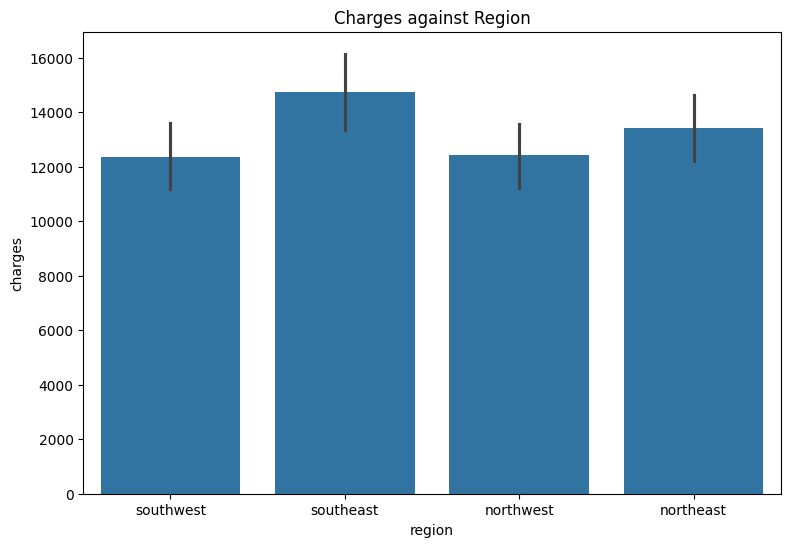

In [14]:
plt.figure(figsize=(9,6))
sns.barplot(medical_df, x='region', y='charges')
plt.title('Charges against Region')


We can infer from the graph above that the _southeast_ region has the highest charges followed by the _northeast_ region.

Now, let's take a look at the _bmi_ column against the _charges._ 

In [15]:
fig6 = px.scatter(medical_df, x='bmi', y='charges', color='smoker', title='Charges against bmi for smokers and non-smokers')
fig6.show()

It seems the is no correlation between the _charges_ and _non-smokers_ but there is a positive correlation between _charges_ and _smokers_ depending on the bmi. That is, for smokers, as the bmi goes up, their charges increases.

We now explore how the medical expenses (_charges_) changes depending on the number of children an individual has.

In [16]:
fig7 = px.violin(medical_df, x='children', y='charges', title='Charges against children')
fig7.show()

## Correlation

Now, let us explore the correlation between each of the numerical features and the _charges._ Later, we will convert the categorical columns to numeric values and check the correlation but now, let's focus on the numeric features. 

Text(0.5, 1.0, 'Correlation Matrix')

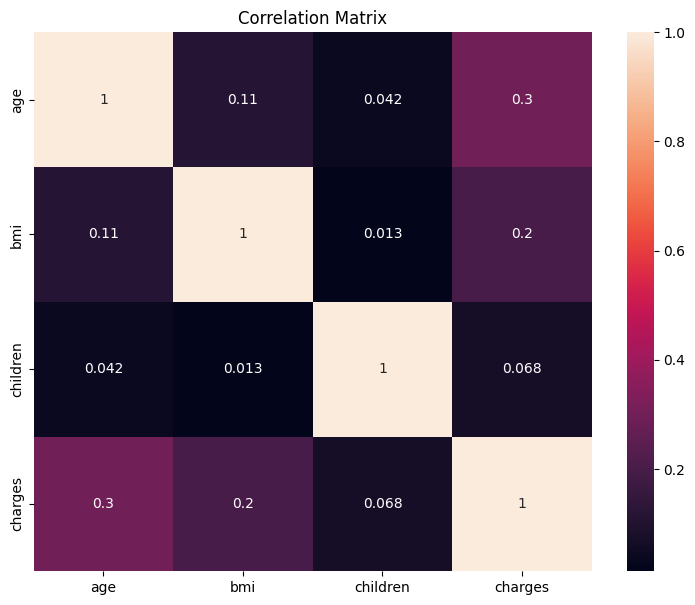

In [17]:
plt.figure(figsize=(9,7))
sns.heatmap(medical_df.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')

From the correlation matrix above, we can see that there is a strong correlation between _age_ and _charges._ The next is the _bmi._ Hence we will now start by looking at building a model for the _charges_ against _age_

# Linear Regression Using a Single Feature.

The goal is to be able to fit a line that can be used to predict the value of the output given the value of the input. Generally, it has the form, 

$$y = w x + b$$   
$y$ is the output,  
$w$ is the weight attached to the input variable $x$  
$x$ is the input variable and  
$b$ is the bias

Let's build a function that takes the weight $w$ and bias $b$ as input and plots the regression line.

Let's split the dataset into smokers and non-smokers

In [18]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
non_smoker_df = medical_df[medical_df['smoker'] == 'no']

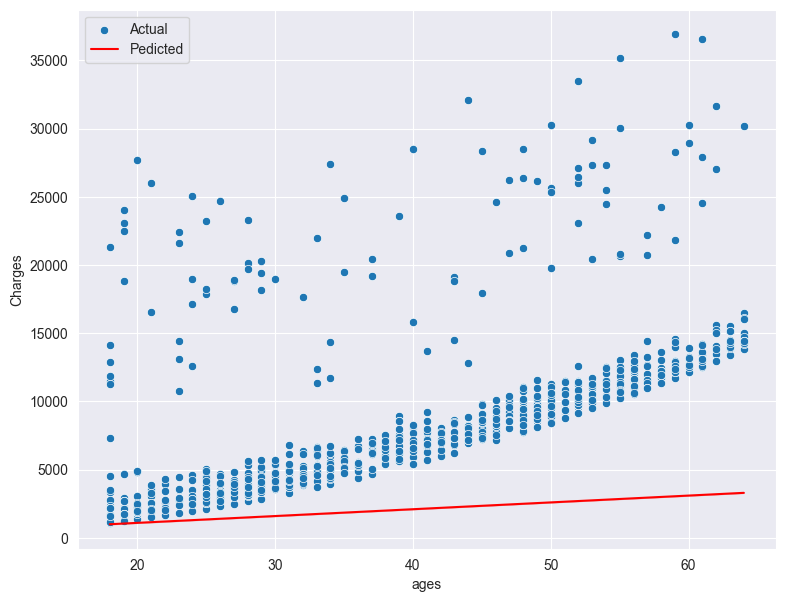

In [19]:
estimated_result = lambda w, b, age: w*age + b

def try_parameters(w,b):
    targets = non_smoker_df['charges']
    predicted = estimated_result(w,b,non_smoker_df['age'])

    plt.figure(figsize=(9,7))
    sns.set_style('darkgrid')

    sns.scatterplot(non_smoker_df, x=non_smoker_df['age'], y=non_smoker_df['charges'], label='Actual')
    sns.lineplot(x=non_smoker_df['age'], y=predicted, color='red', label='Pedicted')
    plt.xlabel('ages')
    plt.ylabel('Charges')
    

try_parameters(50,100)

## Loss function

Root Mean Squared error is the square root of the averaged sum of squares error. Mathematically, it is given by,

$$rmse = \sqrt{\frac{\sum_{i=0}^{N} (\text{predicted}_{i} - \text{actual}_{i})^{2}}{N}} $$

The higher the $rmse,$ the lower the accuracy of the model in making predictions and vice versa.


Let's now write a function to compute the $rmse.
$ 

In [20]:
rmse = lambda predicted, actual: np.sqrt( np.sum( np.square( predicted - actual ) ) / len(predicted))

Now, we modiy the ```try_parameters``` function to return the root mean squared error.

Loss: 8461.949562575493


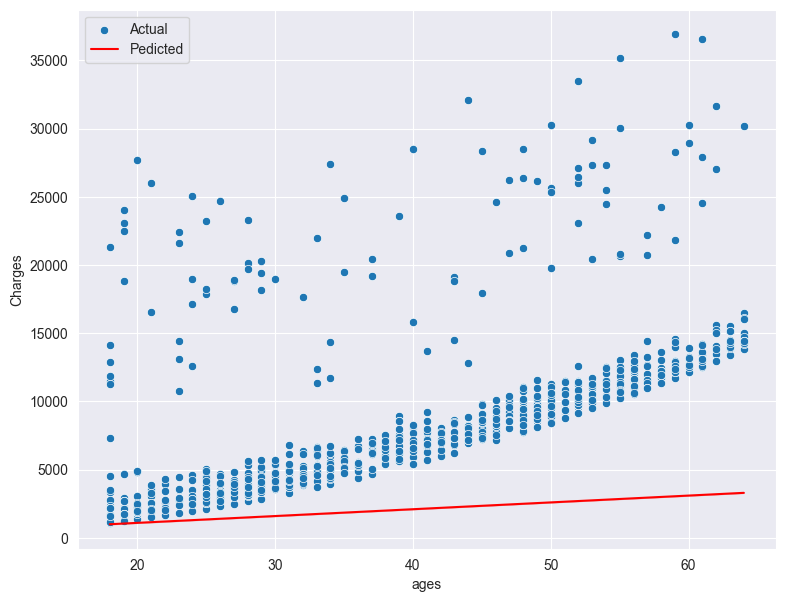

In [21]:
def try_parameters2(w,b):
    targets = non_smoker_df['charges']
    predicted = estimated_result(w,b,non_smoker_df['age'])
    

    plt.figure(figsize=(9,7))
    sns.set_style('darkgrid')

    sns.scatterplot(non_smoker_df, x=non_smoker_df['age'], y=non_smoker_df['charges'], label='Actual')
    sns.lineplot(x=non_smoker_df['age'], y=predicted, color='red', label='Pedicted')
    plt.xlabel('ages')
    plt.ylabel('Charges')

    loss = rmse(predicted=predicted, actual=targets)
    print(f"Loss: {loss}")
    

try_parameters2(50,100)

We need to find a way to optimize the values of $w$ and $b$ that fits the best model. We can do this in two ways;
1. Ordinary Least Squares
2. Stochastic Gradient Descent.

## Linear Regression using Scikit-learn library

We use the LinearRegression class of the sklearn.linear_model library

In [22]:
inputs1 = non_smoker_df[['age']]
target1 = non_smoker_df['charges']

model1 = LinearRegression() # This creates a new linear regression object

model1.fit(inputs1, target1) # This determines the coeficients and the intercepts.

LinearRegression()

After we have fitted the model, we can now use it to make predictions.

Loss: 4662.505766636395


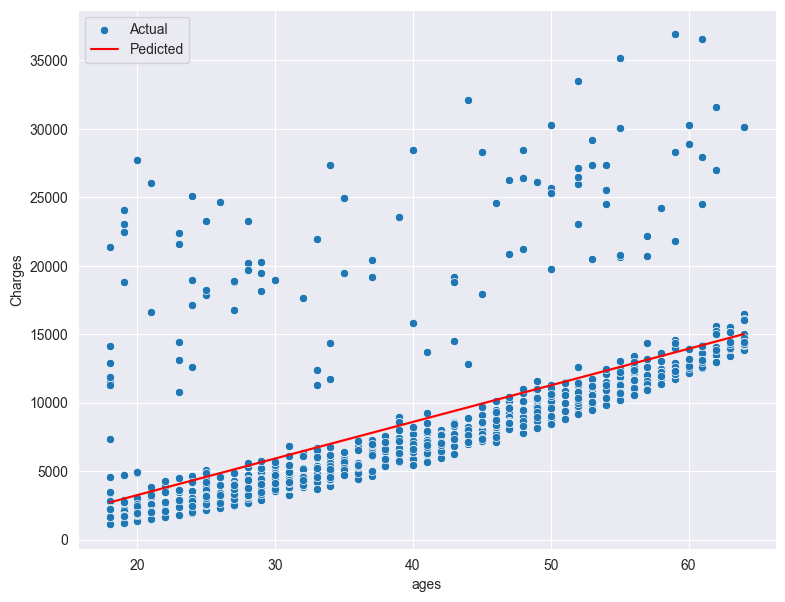

In [23]:
w = model1.coef_ # Coefficients of the fitted model
b = model1.intercept_ # intercept of the fitted line

try_parameters2(w, b)

As we can see, this is a good model than the one we had previously. Also, the $rmse$ has decreased to 4662.505 which is a good sign. Our model is now accurate than it was before.

We can make predictions using the model we've built as follows;

In [24]:
model1.predict(inputs1)

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

## Stochastic Gradient Descent

Now, let's try replicating this using the stochastic gradient descent approach.

Loss: 5556.067040106638


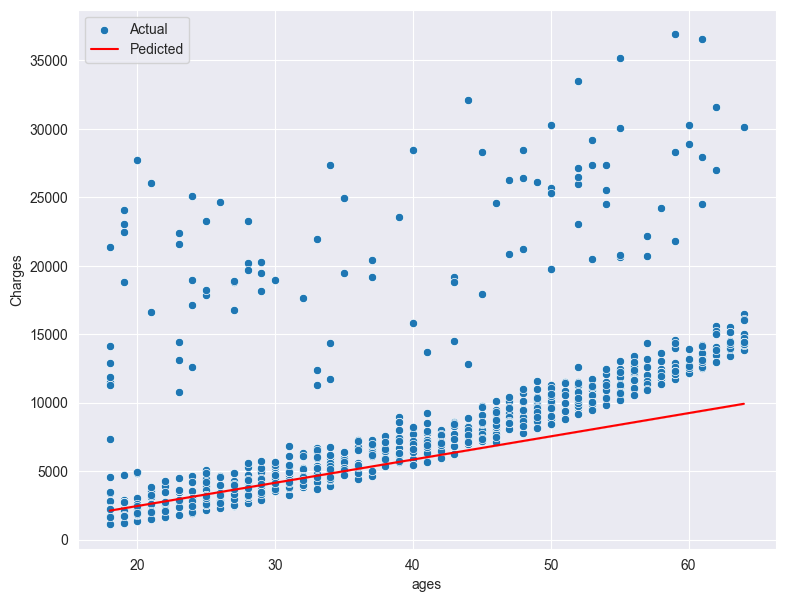

In [25]:
model_sgd = SGDRegressor() # This creates a stochastic gradient descent object.

model_sgd.fit(inputs1, target1) #

w_sgd = model_sgd.coef_
b_sgd = model_sgd.intercept_

try_parameters2(w_sgd, b_sgd)

As we can see, this gives a higher error than when we used the ordinary least squares method. This may be due to the ffact that this method is more suitable for much larger datasets.

# Linear Regression with Multiple Features.

In this case, we can consider more than just one feature. It generally has the form,
$$y = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + \ldots$$

Let's add the _bmi_ feature to the model and see if there will be a significant change in the loss.


In [26]:
inputs2 = non_smoker_df[['age', 'bmi']]
target2 = non_smoker_df.charges

model2 = LinearRegression().fit(inputs2, target2)

predictions = model2.predict(inputs2)

loss2 = rmse(predictions, target2)
print(f"Loss: {loss2}")

Loss: 4662.3128354612945


There was only a 0.2 decrease in the $rmse.$ This implies that the _bmi_ column does not contribute much to the _charges_ (it has a very weak correlation with _charges_). Let's visualize the _bmi_ column against _charges_ for the non-smokers.

In [27]:
fig8 = px.scatter(non_smoker_df, x='bmi', y='charges', title='bmi Vs. charges for non-smokers')
fig8.show()

As we can see from the graph, there appear to be no correlation.

Now, let's add the _children_ feature to the model and see what becomes of the $rmse.$

In [28]:
inputs3 = non_smoker_df[['age', 'bmi', 'children']]

model3 = LinearRegression().fit(inputs3, target2)

predictions2 = model3.predict(inputs3)

loss3 = rmse(predictions2, target2)
print(f"Loss: {loss3}")

Loss: 4608.470405038247


There seem to be a somewhat decrease in the error when we added the children feature to the model. 

We now consider the entire dataset using all the numeric columns to determine the $rmse.$

In [29]:
entire_inputs1 = medical_df[['age', 'bmi', 'children']]
entire_target1 = medical_df['charges']

entire_model = LinearRegression().fit(entire_inputs1, entire_target1)

entire_predictions1 = entire_model.predict(entire_inputs1)

loss_entire = rmse(entire_predictions1, entire_target1)
print(f"Loss: {loss_entire}")

Loss: 11355.317901125973


When we consider all the numeric columns for the entire dataset, we get a much larger error.

## Using Categorical Features.

We cannot use compute the correlation for categorical variables directly so instead, we convert them into numerical values. This can be done in a number of ways;
1. If the categorical variable is binary (it has only two distint categories), we represent them by _0_ and _1._
2. If there are more the two distinct categories and there is no inherent orddering, we use _'One Hot Encoding'._ That is we create a column for every distinct categorical value that has a _1_ in the row in which it was recorded and _0_ elswhere.
3. If there are more than two categories and there is an inherent order, we use numerical values that preserve order. For instance (1,2,3,...). These categorical values are called ordinals.

### Binary Categories

In the given dataset, we have two binary categorical variables, (_'smoker'_ and _'sex'_). We will convert them to numerical values and add it to the model one after the other and see the impact they have on the $rmse.$ We start with the _'smoker'_ feature.

In [30]:
smoker_numeric_codes = {'yes': 1, 'no': 0}
medical_df['smoker_codes'] = medical_df['smoker'].map(smoker_numeric_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


Now that we have successfully converted the smoker feature to numerical values and added it to the dataframe, we add it to the model and see check if there will be a significant decrease in the $rmse.$

In [31]:
entire_inputs2 = medical_df[['age', 'bmi', 'children', 'smoker_codes']]

entire_model2 = LinearRegression().fit(entire_inputs2, entire_target1)

predictions3 = entire_model2.predict(entire_inputs2)

loss4 = rmse(predictions3, entire_target1)
print(f"Loss: {loss4}")

Loss: 6056.439217188081


Adding the _smoker_ feature decreases the $rmse$ by almost 50%. This indicates a very strong correlation between _'charges'_ and the _'smoker'_ feature.

Next, we convert and add the _'sex'_ feature to the model.

In [32]:
sex_numeric_codes = {'female': 0, 'male': 1}
medical_df['sex_codes'] = medical_df['sex'].map(sex_numeric_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


Now, we add it to the model.

In [33]:
entire_inputs3 = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_codes']]

entire_model3 = LinearRegression().fit(entire_inputs3, entire_target1)

predictions4 = entire_model3.predict(entire_inputs3)

loss5 = rmse(predictions4, entire_target1)
print(f"Loss: {loss5}")

Loss: 6056.100708754546


After adding the _'sex'_ feature, there was only a 0.4 decrease in the root mean squared error indicating a very low correlation.

### One Hot Encoding

We use the OneHotEncoder class from the preprocessing submodule of the scikit learn module. 

In [34]:
enc = OneHotEncoder() # This creates a one hot encoder object

enc.fit(medical_df[['region']]) # This identifies the distinct categorical values in the specified column.

enc.categories_ # This returns the distinct values identified



[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [35]:
one_hot = enc.transform(medical_df[['region']]).toarray() # This actual does the encoding.
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

Now, we can add these columns to the dataframe.

In [36]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Now we can add these columns to the model.


In [37]:
input_cols = ['age', 'bmi', 'children', 'smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
entire_inputs4 = medical_df[input_cols]

entire_model4 = LinearRegression().fit(entire_inputs4, entire_target1)

predictions5 = entire_model4.predict(entire_inputs4)

loss6 = rmse(predictions5, entire_target1)
print(f"Loss: {loss6}")

Loss: 6041.6796511744515


This resulted only in a very small decrease in the error, yet again indicating a very weak correlation.

# Feature Scaling

In [38]:
weight_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(entire_model4.coef_, entire_model4.intercept_)
})
weight_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_codes,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


As we can see from the dataframe above, the weights associated with the features have a very wide range and does not reflect the true relationship. For instance, we know that _age_ has a higher correlation to _charges_ than _bmi_ and _children_ yet both _bmi_ and _children_ have higher weights attached to them than the weight associated with _age._ This problem is caused by the different ranges of the numeric features.

To solve this, we scale all the numeric columns so that they all have a common range. This is normally done using the **$z-$score.** It's mathematical reppresentationis given below.

$$z = \frac{x - \mu}{\sigma}$$

$x$ is the data point.

$$\mu = \frac{1}{N} \sum_{i=0}^{N} x_{i}$$

$$\sigma = \sqrt{ \frac{1}{N} \sum_{i=0}^{N} (x_{i} - \mu)^{2} }$$

We can standardize the numeric columns using the StandardScaler class of sklearn.preprocessing

In [39]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler() # This creates a standard scaler object

scaler.fit(medical_df[numeric_cols]) # This calculates the mean and varian of the specified columns.

StandardScaler()

Mean

In [40]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

Variance

In [41]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

Now we can call the transform method of the scaler object to actually standardize these columns. 

In [42]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

Now that all the numeric columns have a common range, we can combine it with the categorical data.

In [43]:
cat_cols = ['smoker_codes', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

We can go ahead and fit a new model using these

In [44]:
new_inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
new_targets = medical_df['charges']

new_model = LinearRegression().fit(new_inputs, new_targets)

new_predictions = new_model.predict(new_inputs)

new_loss = rmse(new_predictions, new_targets)
print(f"New loss: {new_loss}")


New loss: 6041.679651174452


The $rmse$ didn't seem to have changed but now when we look as the weights attached to the features, they make much sence and reflects the actual relationship between the features and the target.

In [45]:
new_weight_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(new_model.coef_, new_model.intercept_)
})
new_weight_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_codes,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_codes,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As expected, _smoker_ has a very high correlation with _charges_ and hence has the highest weight followed by _age,_ _bmi,_ etc. in that order. Now we can use the model to make predictions and accuractely explain why we might get one result or the other.